In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In [2]:
data_train = pd.read_csv(r"D:\emotion analysis\emotion_model-main\emotion_model-main\data_train.csv")
data_test = pd.read_csv(r"D:\emotion analysis\emotion_model-main\emotion_model-main\data_test.csv")

In [3]:
data_train.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [4]:
len(data_train), len(data_test)

(7934, 3393)

In [5]:
data_train.info(), data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7934 entries, 0 to 7933
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  7934 non-null   object
 1   Text     7934 non-null   object
dtypes: object(2)
memory usage: 124.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393 entries, 0 to 3392
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  3393 non-null   object
 1   Text     3393 non-null   object
dtypes: object(2)
memory usage: 53.1+ KB


(None, None)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

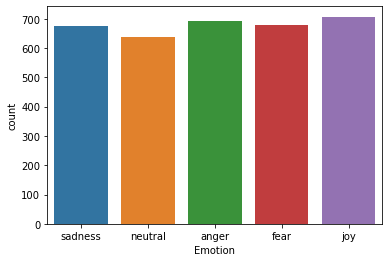

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data_test, x= 'Emotion' ) 
 

<AxesSubplot:xlabel='Emotion', ylabel='count'>

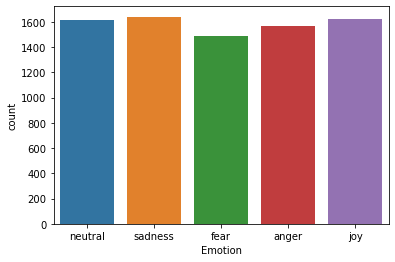

In [7]:
sns.countplot(data=data_train, x= 'Emotion' )

In [8]:
X_train = data_train['Text']
X_test = data_test['Text']

In [9]:
y_train = data_train['Emotion']
y_test = data_test['Emotion']

In [10]:
data = data_train.append(data_test, ignore_index = True)

In [11]:
data

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
...,...,...
11322,sadness,"My sweetheart left me, or rather we decided to..."
11323,sadness,"Well , it's too bad that we like different kin..."
11324,neutral,It sure is .
11325,sadness,He ’ s got laid off again . I do feel sorry fo...


In [12]:
data.columns

Index(['Emotion', 'Text'], dtype='object')

In [13]:
data.shape

(11327, 2)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

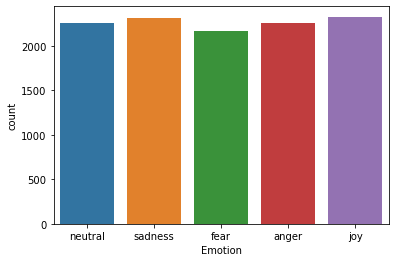

In [14]:
sns.countplot(data = data, x= 'Emotion')

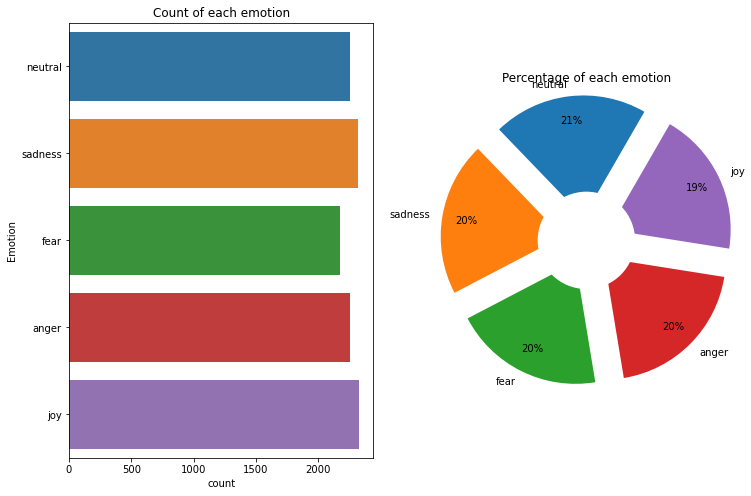

In [15]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(data["Emotion"].dropna().value_counts()))/sum(list(data["Emotion"].dropna().value_counts())))[::-1])[:]
labels = list(data["Emotion"].dropna().unique())[:]
sizes = data["Emotion"].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y="Emotion", data= data, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [16]:
num_classes = 5

embed_num_dims = 300

max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [17]:
def clean_text(data):
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    data = word_tokenize(data)
    return data

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arjit
[nltk_data]     Giri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
texts = [' '.join(clean_text(text)) for text in data.Text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

Number of unique words: 12087


array([[    0,     0,     0, ...,   119,    51,   345],
       [    0,     0,     0, ...,    37,   277,   154],
       [    0,     0,     0, ...,    16,     2,  1210],
       ...,
       [    0,     0,     0, ...,   876,     4,   909],
       [    0,     0,     0, ...,     1,     6,   117],
       [    0,     0,     0, ..., 10258,   173,    13]])

In [21]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [23]:
 #import pretained word vectors

In [24]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath, 'r', errors = 'ignore', encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype= np.float32)[:embedding_dim]
    return embedding_matrix

In [25]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'


if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

In [26]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(12088, 300)

In [27]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

MODEL PIPELINE


In [28]:
gru_output_size = 64
bidirectional = True

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          3626400   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              140544    
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 3,767,589
Trainable params: 141,189
Non-trainable params: 3,626,400
_________________________________________________________________


In [30]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [31]:
batch_size = 128
epochs = 25

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/25
62/62 [==============================] - 479s 7s/step - loss: 1.4579 - accuracy: 0.3687 - val_loss: 1.3390 - val_accuracy: 0.4244
Epoch 2/25
62/62 [==============================] - 486s 8s/step - loss: 1.2321 - accuracy: 0.4958 - val_loss: 1.1555 - val_accuracy: 0.5352
Epoch 3/25
62/62 [==============================] - 500s 8s/step - loss: 1.0473 - accuracy: 0.5911 - val_loss: 0.9690 - val_accuracy: 0.6381
Epoch 4/25
62/62 [==============================] - 587s 9s/step - loss: 0.8848 - accuracy: 0.6710 - val_loss: 0.8431 - val_accuracy: 0.6976
Epoch 5/25
62/62 [==============================] - 451s 7s/step - loss: 0.7992 - accuracy: 0.7179 - val_loss: 0.8096 - val_accuracy: 0.7041
Epoch 6/25
62/62 [==============================] - 455s 7s/step - loss: 0.7626 - accuracy: 0.7194 - val_loss: 0.7930 - val_accuracy: 0.7100
Epoch 7/25
62/62 [==============================] - 428s 7s/step - loss: 0.7221 - accuracy: 0.7383 - val_loss: 0.7695 - val_accuracy: 0.7262
Epoch 8/25
62

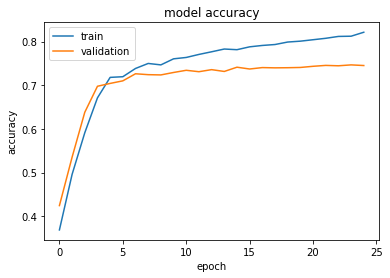

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

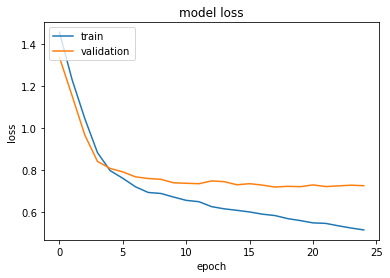

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [46]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [47]:
print("Accuracy: {:.2f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

Accuracy: 74.51%

F1 Score: 74.51


In [36]:
import time
def review(message):
  seq = tokenizer.texts_to_sequences(message)
  padded = pad_sequences(seq, maxlen=max_seq_len)

  start_time = time.time()
  pred = model.predict(padded)

  print('Message: ' + str(message))
  print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

In [37]:
print('Message: {}\nPredicted: {}'.format(X_test[4], predictions[4]))

Message: My boyfriend didn't turn up after promising that he was coming.
Predicted: sadness


In [38]:
mes = ['There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam']


In [39]:
review(mes)

Message: ['There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam']
predicted: neutral (5.66 seconds)


In [40]:
mes = ['they all are being dumb and careless. i did not want to talk to then']

In [41]:
review(mes)

Message: ['they all are being dumb and careless. i did not want to talk to then']
predicted: anger (3.27 seconds)


In [51]:
message_3 = ['Same as I phone 12 😑. Who so ever is reading this review I suggest go for I phone 12'] 
review(message_3)

Message: ['Same as I phone 12 😑. Who so ever is reading this review I suggest go for I phone 12']
predicted: joy (1.03 seconds)


In [52]:
message_5 = ['no one loves me i wanted to die'] 
review(message_5)

Message: ['no one loves me i wanted to die']
predicted: sadness (1.08 seconds)


In [53]:
ar = ['i am very sad']
review(ar)

Message: ['i am very sad']
predicted: sadness (1.01 seconds)
